<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BSSH%5DQuiz_DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz (Week 11) – 80 marks
- Please **create a copy** your own drive and save the file as `<your_initials>-Quiz.ipynb`, e.g. `GN-Quiz.ipynb, RCE-Quiz.ipynb`, etc.
- There are TWO parts to this quiz
- Please answer all parts and questions
- Connect to a hosted runtime with **GPU enabled**
- You should provide the output for each code cell
- Whatever submitted will be the only accepted solutions. There will be no other reasons or files accepted so make sure the file that you submit by the deadline is the final one
- **TIPS**: 
  - If you are short for time, your training code should show AT LEAST 1 epoch to get credit
  - If you want to retrain the model, make sure to create the NN model and optimiser again before running the training loop
  - If the training is too slow (more than 10s per iteration) or you get an unusual error that is not related to code (e.g. related to machine), then *Restart runtime* and run each code cell again or *Restart and run all* (this will run all code cells from the top, so use with caution)
  - You are recommended to work on Part 2 on a separate Notebook (using only CPU) while waiting for Part 1's training to complete (5 epochs takes around 5 - 6mins)


# Part 1: Image Classification using FashionMNIST (60 marks)

### Imports, Device configuration and Hyper parameter setting
- Run this code cell

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

# 0. Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# 1. Hyper parameters - DO NOT CHANGE THESE VALUES
num_epochs = 5
batch_size = 4
learning_rate = 0.001


cuda


### Data Download & Inspection (10 marks)
- We are going to work with the FashionMNIST dataset
- You will load FashionMNIST from PyTorch's preloaded datasets

In [2]:
# Data loading
train_set = torchvision.datasets.FashionMNIST("./data", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST("./data", train=False, download=True, transform=transforms.ToTensor())


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [11]:
# Q1. Write code to answer the following questions
# a. How many images are in the training set? (1)
print(f'There are {len(train_set)} images in training set.')
# b. How many images are in the test set? (1)
print(f'There are {len(test_set)} images in test set.')


There are 60000 images in training set.
There are 10000 images in test set.


Inspect the first image's details

In [12]:
for image,label in train_set:
    print("Image shape: ",image.shape)
    print("Label: ", label)
    break


classes = train_set.classes
print(classes)


Image shape:  torch.Size([1, 28, 28])
Label:  9
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [15]:
# Q2. No code required.
# a. What does each dimension of the image's shape refer to? (3)
print('It means that the images has only 1 channel(black-white), 28, 28 means that the size of each image is 28*28.')

# b. What is the numeric class label for an image of class 'Sandal'? (1)
print('It is 5.') 

It means that the images has only 1 channel(black-white), 28, 28 means that the size of each image is 28*28.
It is 5.


### Add Transform & Reload Images

In [16]:
# Q3. The transform should include a tensor transformation and a NORMALIZATION with mean 0.5 and std 0.5 in each channel
# Reload the train and test sets with these tranformations (4)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.FashionMNIST("./data", train=True, download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST("./data", train=False, download=True, transform=transform)

### DataLoader & Visualisation (5 marks)

In [17]:
batch_size

4

In [18]:
# Q4. 
# a. Use DataLoader class to get batches of batch_size and shuffle the data for training. 
# Load them into train and test loaders (4)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle = False)

### Visualise the images in the batches

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


class labels: tensor([5, 0, 7, 3])
		Sandal 		T-shirt/top 		Sneaker 		Dress


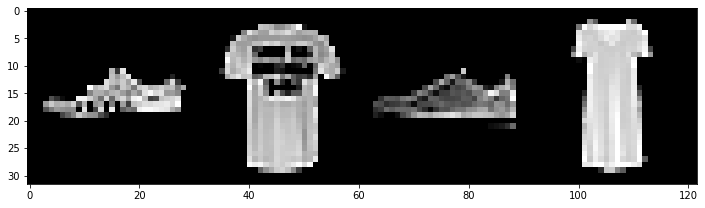

In [20]:
# Load a sample batch using the DataLoader iterator
batch = next(iter(train_loader))

images, labels = batch

# Create and visualise in grid 
plt.figure(figsize=(12,12))
grid = torchvision.utils.make_grid(tensor=images, nrow=4) # nrow = number of images displayed in each row

print(f"class labels: {labels}")

plt.imshow(grid.permute(1,2,0))
print(' '.join('\t\t{}'.format(classes[labels[j]]) for j in range(batch_size)))

In [22]:
# b. Why do the images look dark and a bit different to what we would expect to see? (1)
print('Because it is normalized, so it may look different from the original picture')

Because it is normalized, so it may look different from the original picture


## Define a Neural Network Class (8 marks)
- A skeleton of the neural network has been given. 
- Fill out the MISSING CODE and leave everything else UNCHANGED

In [29]:
train_set[0][0].shape

torch.Size([1, 28, 28])

In [36]:
conv1 = (28 - 3 + 2) + 1
print(f'conv1: {conv1}')
conv1_pool = conv1/2
print(f'conv1_pool: {conv1_pool}')
conv2 = (conv1_pool - 3) + 1
print(f'conv2 : {conv2}') 
conv2_pool = conv2/2
print(f'conv2_pool: {conv2_pool}')
num_nodes = int(conv2_pool * conv2_pool * 20)
print(f'num_nodes: {num_nodes}')

conv1: 28
conv1_pool: 14.0
conv2 : 12.0
conv2_pool: 6.0
num_nodes: 720


In [40]:
# Q5. Fill out the missing code
# Convolved image size = ((input_width - filter_size + 2 * padding) / stride) + 1

class NN1(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, 3, padding=1)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(10, 20, 3) 
    self.fc1 = nn.Linear(num_nodes, 128) # a. Determine the first argument here (1) # It is 720
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64,10 ) # b. Determine the number of output units (1) # It has to be the number of classes, which is 10.

  def forward(self, x):
    out = self.pool(F.relu(self.conv1(x)))
    out = self.pool(F.relu(self.conv2(out)))
    out = out.view(-1,num_nodes) # c. Determine the second argument here (1)
    out = F.relu(self.fc1(out))
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out


# Model, Loss and Optimiser instances
# d. Create a NN instance model (2)
model = NN1().to(device)

# e. Define a suitable loss for this dataset (1)
criterion = nn.CrossEntropyLoss()

# f. Use SGD optimiser from torch.optim. For now, ONLY supply the model parameters that it will optimise 
# and the learning rate (2)
import torch.optim as optim

opt = optim.SGD(model.parameters(), lr = learning_rate)

## Training loop (10 marks)
- Create a training loop that will train over num_epochs times by loading one batch at a time
- Fill out the code for the backward pass
- You are recommended to look at the model improvement (Q9) or Part 2 while waiting for training to complete

In [85]:
# Q6. Fill in the MISSING CODE and ensure that this code cell is run until training completes
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

for epoch in range(num_epochs):
  print("\n")
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # a. Forward pass (2)
    outputs = model(images)
    loss = criterion(outputs, labels)

    # b. Backward pass (3)
    opt.zero_grad()
    loss.backward()
    opt.step()
    
    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')

# c. Full training completion (5 marks) NO CODE REQUIRED HERE



Epoch 1/5, Iteration 1000/15000, Loss=0.7988 
Epoch 1/5, Iteration 2000/15000, Loss=0.3200 
Epoch 1/5, Iteration 3000/15000, Loss=0.3783 
Epoch 1/5, Iteration 4000/15000, Loss=0.5690 
Epoch 1/5, Iteration 5000/15000, Loss=0.7036 
Epoch 1/5, Iteration 6000/15000, Loss=0.0513 
Epoch 1/5, Iteration 7000/15000, Loss=0.2222 
Epoch 1/5, Iteration 8000/15000, Loss=0.2202 
Epoch 1/5, Iteration 9000/15000, Loss=0.3487 
Epoch 1/5, Iteration 10000/15000, Loss=0.0171 
Epoch 1/5, Iteration 11000/15000, Loss=1.9025 
Epoch 1/5, Iteration 12000/15000, Loss=0.6904 
Epoch 1/5, Iteration 13000/15000, Loss=0.5106 
Epoch 1/5, Iteration 14000/15000, Loss=1.5588 
Epoch 1/5, Iteration 15000/15000, Loss=0.2464 


Epoch 2/5, Iteration 1000/15000, Loss=0.0641 
Epoch 2/5, Iteration 2000/15000, Loss=0.2830 
Epoch 2/5, Iteration 3000/15000, Loss=0.1485 
Epoch 2/5, Iteration 4000/15000, Loss=0.2246 
Epoch 2/5, Iteration 5000/15000, Loss=0.6862 
Epoch 2/5, Iteration 6000/15000, Loss=0.6148 
Epoch 2/5, Iteration 700

## Evaluation (5 marks)
- This function calculates the accuracy of a model over a data set from a data loader
- It prints the accuracy of the model over the whole dataset and over individual classes
- You may call this function to determine the train and test set accuracies

In [47]:
# Run this code cell
def get_accuracy(model, data_loader):
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(len(train_set.classes))]
    n_class_samples = [0 for i in range(len(train_set.classes))]

    model.eval()
    # Loop through test set
    for images, labels in data_loader:
      images = images.to(device)
      labels = labels.to(device)
      # Run on trained model
      outputs = model(images) 

      # Get predictions
      _, y_preds = torch.max(outputs, 1)
      n_samples += labels.size(0) # different to FFNN
      n_correct += (y_preds == labels).sum().item()

      # Keep track of each class
      for i in range(batch_size):
        label = labels[i]
        pred = y_preds[i]
        if (label == pred):
          n_class_correct[label] += 1
        n_class_samples[label] += 1

    # Print accuracy
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the WHOLE CNN = {acc:.3f} %')

    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_samples[i]
      print(f'Accuracy of {classes[i]}: {acc:.3f} %')

In [88]:
# Q7. Determine the accuracy of the train set (~10s) (2.5)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images) 

    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) 
    n_correct += (y_preds == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


Test Accuracy of the WHOLE CNN = 11.528333333333334 %
Accuracy of T-shirt/top: 0.0 %
Accuracy of Trouser: 95.81666666666666 %
Accuracy of Pullover: 0.0 %
Accuracy of Dress: 0.0 %
Accuracy of Coat: 0.0 %
Accuracy of Sandal: 0.0 %
Accuracy of Shirt: 0.0 %
Accuracy of Sneaker: 19.466666666666665 %
Accuracy of Bag: 0.0 %
Accuracy of Ankle boot: 0.0 %


In [87]:
# Q8. Determine the accuracy of the test set (~10s) (2.5)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images) 

    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) 
    n_correct += (y_preds == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


Test Accuracy of the WHOLE CNN = 11.82 %
Accuracy of T-shirt/top: 0.0 %
Accuracy of Trouser: 96.4 %
Accuracy of Pullover: 0.0 %
Accuracy of Dress: 0.0 %
Accuracy of Coat: 0.0 %
Accuracy of Sandal: 0.0 %
Accuracy of Shirt: 0.0 %
Accuracy of Sneaker: 21.8 %
Accuracy of Bag: 0.0 %
Accuracy of Ankle boot: 0.0 %


## Model Improvement
- The model should have pretty high accuracy overall (over 80%), but note that the class "Shirt" has quite low accuracy on both train and test sets
- Introduce the following **improvements** to your model:
  - Add `weight decay 0.001` and `momentum 0.9`
  - Increase the number of units one or more of the convolution layers (each conv layer should **not have more than 25 units**)
  - Add `batchnorm` layer to AT LEAST ONE of the convolutional and at least one of the linear layers and a `dropout of 0.4` to ONE of the layers
- Your improved model should have **training accuracy of at least 90%** and the accuracy for class **"Shirt" should be AT LEAST 70%** for BOTH training and test sets **within 5 epochs**
- You MUST have two separate runs, one for `model` (above) and one for `model2` (below)
- **IMPORTANT!** 
  - Due to time limit you are strongly advised to follow the recommendations above. 
  - However, if you have other options for model improvement (except for increasing `num_epochs`), you may do so, e.g. adding convolutions, changing learning rate, etc. You will not be given extra time if your training is going to take too long with your changes.
  - You MUST, however, have at least ONE 2-D CONV layer in your network. 

### Improve NN Model Architecture (12 marks)
- Fill out your changes to the NN to the new class `NN2`
- The skeleton from Part 1 is given below. Modify it as you see fit

In [61]:
# Convolved image size = ((input_width - filter_size + 2 * padding) / stride) + 1
conv1 = (28 - 3 + 2) + 1
print(f'conv1: {conv1}')
conv1_pool = conv1/2
print(f'conv1_pool: {conv1_pool}')
conv2 = (conv1_pool - 3) + 1
print(f'conv2 : {conv2}') 
conv2_pool = conv2/2
print(f'conv2_pool: {conv2_pool}')
num_nodes = int(conv2_pool * conv2_pool * 20)
print(f'num_nodes: {num_nodes}')

conv1: 28
conv1_pool: 14.0
conv2 : 12.0
conv2_pool: 6.0
num_nodes: 720


In [62]:
6-3+2 +1

6

In [63]:
6*6*40

1440

In [91]:
### I.NN (Neural network improvement) 
# Q9 a. (8)

class NN2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 10, 3, padding=1)
    self.bn_conv = nn.BatchNorm2d(num_features = 10)
    self.relu = nn.ReLU()
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(10, 20, 3) 
    self.conv3 = nn.Conv2d(20, 40, 3, padding = 1)
    self.fc1 = nn.Linear(1440, 128) 
    self.bn1 = nn.BatchNorm1d(num_features=128)
    self.fc2 = nn.Linear(128, 64)
    self.bn2 = nn.BatchNorm1d(num_features=64)
    self.fc3 = nn.Linear(64,32)
    self.bn3 = nn.BatchNorm1d(num_features=32)
    self.fc4 = nn.Linear(32,10) 
    self.dropout = nn.Dropout(0.4)

  def forward(self, x):
    out = self.dropout(self.pool(F.relu(self.bn_conv(self.conv1(x)))))
    out = self.dropout(self.pool(F.relu(self.conv2(out))))
    out = self.dropout(self.pool(F.relu(self.conv3(out))))
    out = out.view(-1,1440) 
    out = F.relu(self.bn1(self.fc1(out)))
    out = F.relu(self.bn2(self.fc2(out)))
    out = F.relu(self.bn3(self.fc3(out)))
    out = self.fc4(out)
    return out


# b. Create a NN instance, called model2 (1)
model2 = NN2().to(device)

# c. Define a suitable loss for this dataset (1)
criterion = nn.CrossEntropyLoss()

opt = optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 0.001, momentum = 0.9)


### Train the improved model (5 marks)
- modify any changes to the training loop below

In [93]:
batch_size

4

In [92]:
### I.Train
# Q10. (5)
num_epochs = 10
n_total_steps = len(train_set)
n_iterations = -(-n_total_steps // batch_size) # ceiling division

for epoch in range(num_epochs):
  print("\n")
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # a. Forward pass
    outputs = model2(images)
    loss = criterion(outputs, labels)

    # b. Backward pass
    opt.zero_grad()
    loss.backward()
    opt.step()
    

    # Print
    if (i+1) % 1000 == 0:
      print(f'Epoch {epoch+1}/{num_epochs}, Iteration {i+1}/{n_iterations}, Loss={loss.item():.4f} ')


ValueError: ignored

### Improved Evaluation (5 marks)

In [ ]:
# Q11. Determine the accuracy of the training set (~40s) (2.5)
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model2(images) 

    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) 
    n_correct += (y_preds == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


In [ ]:
# Q12. Determine the accuracy of the test set (~10s) (2.5)

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]


  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model2(images) 

    _, y_preds = torch.max(outputs, 1)
    n_samples += labels.size(0) 
    n_correct += (y_preds == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = y_preds[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Test Accuracy of the WHOLE CNN = {acc} %')

  for i in range(len(classes)):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


# Part 2: Image download and transform (20 marks)


**IMPORTANT**
- **TIP!** If your model in Part 1 is still training, you are strongly urged to open a new Notebook with only CPU enabled, copy the code cells below and paste them on to the new Notebook, and work there. Once done, copy the code cells from the other notebook back here. It is ok if the output is not visible, we can run and verify them.
- In this section, you are going to download two images from the internet and perform simple tranformations on them
- The first image's URL is https://cdn.pixabay.com/photo/2020/04/27/09/21/cat-5098930_1280.jpg (right click, Copy Link Address) 
- The second image's URL is https://cdn.pixabay.com/photo/2017/08/07/18/57/dog-2606759_1280.jpg



--2022-05-04 09:56:54--  https://cdn.pixabay.com/photo/2020/04/27/09/21/cat-5098930_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102281 (100K) [image/jpeg]
Saving to: ‘img1.jpg’

img1.jpg            100%[===================>]  99.88K  --.-KB/s    in 0.01s   

2022-05-04 09:56:54 (6.90 MB/s) - ‘img1.jpg’ saved [102281/102281]



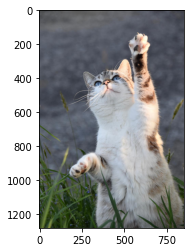

In [67]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image

# Q13. 
# a. Download the image in the URL below and save it as "img1.jpg" (3)
# https://cdn.pixabay.com/photo/2020/04/27/09/21/cat-5098930_1280.jpg

!wget https://cdn.pixabay.com/photo/2020/04/27/09/21/cat-5098930_1280.jpg -O img1.jpg

# b.  Call this PIL image img1 and view it (2)
img1 = Image.open("./img1.jpg")
plt.imshow(img)  


--2022-05-04 09:57:07--  https://cdn.pixabay.com/photo/2017/08/07/18/57/dog-2606759_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238768 (233K) [image/jpeg]
Saving to: ‘img2.jpg’

img2.jpg            100%[===================>] 233.17K  --.-KB/s    in 0.03s   

2022-05-04 09:57:07 (9.00 MB/s) - ‘img2.jpg’ saved [238768/238768]



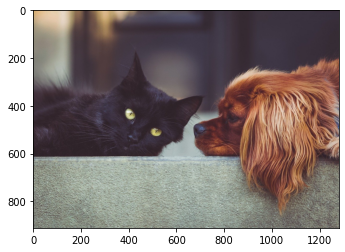

In [70]:
# Q14. 
# a. Download the image in the URL below and save it as "img2.jpg" (3)
# https://cdn.pixabay.com/photo/2017/08/07/18/57/dog-2606759_1280.jpg


!wget https://cdn.pixabay.com/photo/2017/08/07/18/57/dog-2606759_1280.jpg -O img2.jpg

# b. Call this PIL image img2 and view it (2)
img2 = Image.open("./img2.jpg")
plt.imshow(img2)  


Based on these images, perform at least THREE transformations on them (apart from conversion to Tensors) so that each image retains as much information as possible and can be fed into a neural network as training data.

In [71]:
# Q15.
preprocess = T.Compose([
   T.ToTensor(),
   T.Resize(256),
   T.CenterCrop(200),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )   
])


img_tensor1 = preprocess(img1)
img_tensor2 = preprocess(img2)


### Plot the preprocessed images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


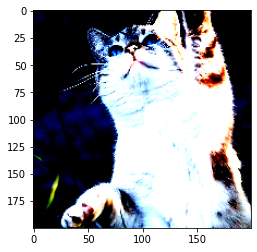

In [72]:
# Q16. View the preprocessed tensor image of img1 (1)
plt.imshow(img_tensor1.permute(1, 2, 0)  )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


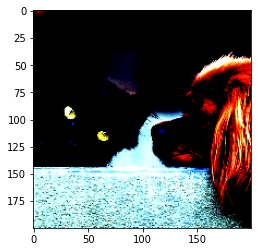

In [73]:
# Q17. View the preprocessed tensor image of img2 (1)
plt.imshow(img_tensor2.permute(1, 2, 0)  )

### Classification Design

In [81]:
# Q18.
# Suppose you want to build a NN classifier that can figure out if an input image contains a cat, a dog or both, 
# how many units would you have in your output layer and what output layer activation function would you use? 
# Given a short justification for your answers. (2)

print('The final output should have 3 classes, cat only/dog only/both.', '\n',
'The activation function can be any non-linear function but it should finally be got through softmax function before calculating the loss.')

The final output should have 3 classes, cat only/dog only/both. 
 The activation function can be any non-linear function but it should finally be got through softmax function before calculating the loss.
